# Problem set 2, Advanced Methods in Applied Statistics
#### Kathrine Kuszon, qlc506
#### Date: March 1st 2023

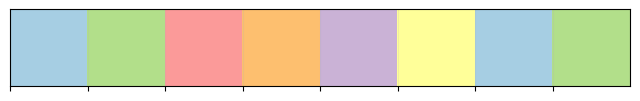

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
import scipy
from scipy import stats
from numpy import random
import seaborn as sns
from importlib import reload

sys.path.append('../')
import ExternalFunctions_KK_version2 as kk

# Plotting parameters
colors = sns.color_palette("Paired", 15, desat=1)[::2]
sns.set_palette(colors)
#sns.palplot(colors)
#plt.style.use('seaborn-white')
plt.rcParams['font.size'] = 17
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.2
plt.rcParams['lines.linewidth'] = 4
plt.rcParams["mathtext.default"]= 'regular'

#plt.rcParams
sns.palplot(colors)

## Problem 0
Plot of a gaussian probability distribution function centered at μ=10 and with $σ^2$=2.3.

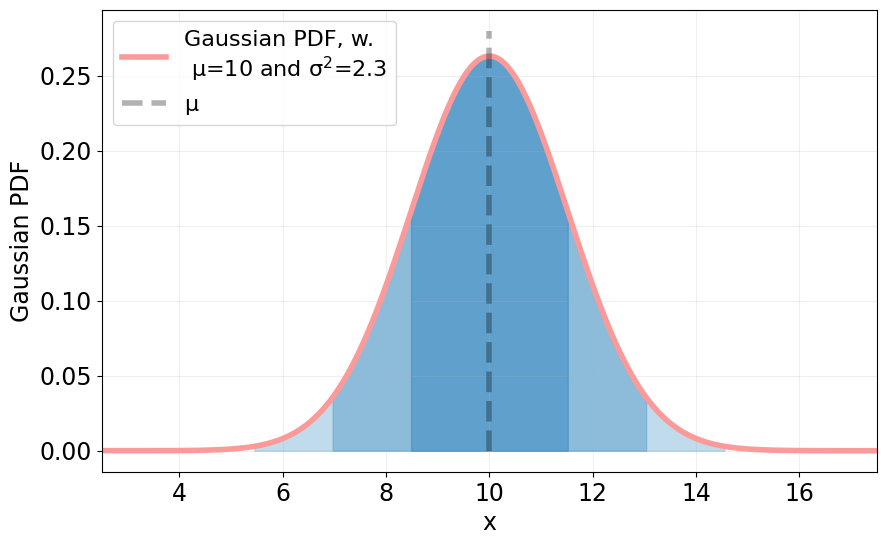

In [8]:
x_arr0 = np.linspace(-10,30,1000)
mean, std = 10, np.sqrt(2.3)
gauss_data0 = stats.norm.pdf(x_arr0, mean, std)

fig, ax = plt.subplots(figsize = (10,6))
ax.plot(x_arr0, gauss_data0,color = colors[2], linewidth=4, label = 'Gaussian PDF, w. \n μ=10 and $σ^2$=2.3')
ax.set(xlabel = 'x', ylabel = 'Gaussian PDF', xlim = (2.5,17.5))

b_cols = sns.color_palette("Blues_d", 10, desat=1)[::2]

ax.vlines(mean, 0, 0.28, color = 'k', alpha=0.3,linestyle='dashed', label = r'$\mu$')

ax.fill_between(np.linspace(mean-3*std, mean+3*std,100),
                stats.norm.pdf(np.linspace(mean-3*std, mean+3*std,100), mean, std), color = b_cols[0],
                alpha = 0.6)#label = '$\pm 3\sigma$',
ax.fill_between(np.linspace(mean-2*std, mean+2*std,100),
                stats.norm.pdf(np.linspace(mean-2*std, mean+2*std,100), mean, std),color = b_cols[1],
                alpha = 0.6) #label = '$\pm 2\sigma$',
ax.fill_between(np.linspace(mean-std, mean+std,100),
                stats.norm.pdf(np.linspace(mean-std, mean+std,100), mean, std), color = b_cols[2],
                alpha = 0.6) # label = '$\pm 1\sigma$', alpha = 0.8)


ax.legend(fontsize = 16, loc = 'upper left');

In [9]:
# Checking area under curve
np.trapz(gauss_data0,x_arr0)

0.9999999999999999

## Problem 1
- Generate 2 separate sets of Monte Carlo data 
- Find the maximum likelihood estimator (MLE) ‘best-fit’ values for α̂ and β for the first data set, and λ ̂ for the second data set.
- Submit the two Monte Carlo generated data sets along with your MLE estimates of α̂ and β, and λ.
- Include plots of the histogrammed MC data as well as the best-fit function for each function.

### Monte Carlo data set 1

In [10]:
# Initializing for Monte Carlo data set 1

def func_pdf(x, alpha, beta):
    f = 1 + alpha*x + beta*x**2
    N = 2.13 + 0.09585*alpha + 0.809613*beta  # normalizing: integral of function in wolframalpha
    return f / N

alpha_true, beta_true = 0.9, 0.55
N_func = 807

xmin_func, xmax_func = -1.02, 1.11

# Generating data using Monte Carlo acc-rej
func_data = kk.acc_rej(func_pdf, [alpha_true, beta_true], xmin_func, xmax_func, N_func)

# Saving data-set generated
points_func = np.array([func_data[0], func_data[2]]).T
np.savetxt('kuszon_polynomial.txt',points_func)

In [11]:
# Fitting by minimizing the log-likelihood
par_name, par, par_err, _ , _= kk.likelihood_fit(func_data[0],func_pdf, [alpha_true,beta_true],['alpha','beta'])

print('Best fit values:')
for i in range(2):
    print(f'{par_name[i]}, {par[i]} +/- {par_err[i]}')

Best fit values:
alpha, 0.8349004779532605 +/- 0.08290213100728144
beta, 0.4422347323517458 +/- 0.1364689983981942


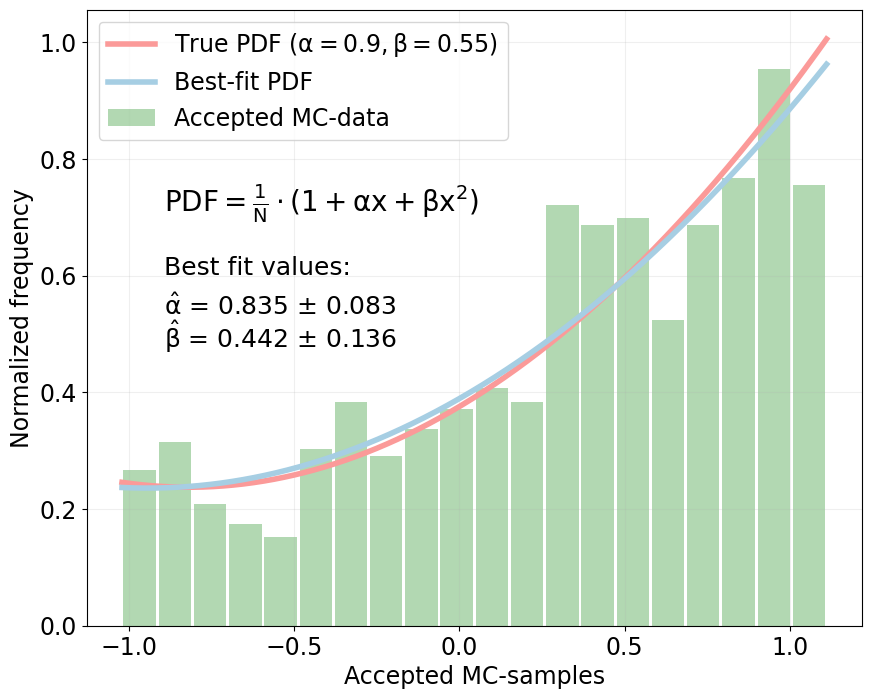

In [12]:
fig1, ax1 = plt.subplots(figsize = (10,8))

ax1.plot(func_data[1], func_pdf(func_data[1], alpha_true,beta_true),color=colors[2], label = r'True PDF ($\alpha = 0.9, \beta=0.55$)');

ax1.plot(func_data[1], func_pdf(func_data[1], par[0],par[1]), label = 'Best-fit PDF');

kk.plot_hist(func_data[0], xmin_func, xmax_func, 20, ax1, xlabel='Accepted MC-samples', ylabel='Normalized frequency',
             label = 'Accepted MC-data', density = True, plot_err = False, d_print=False)

#ax1.scatter(func_data[0],func_data[2], marker='.',color=colors[1], label = 'MC-data points')

ax1.text(0.1, 0.72, r'$PDF = \frac{1}{N} \cdot (1+\alpha x + \beta x^2)$', fontsize=20, 
         transform=ax1.transAxes, verticalalignment='top', color = 'k');

ax1.text(0.1, 0.60, r'Best fit values:', fontsize=18,
         transform=ax1.transAxes, verticalalignment='top', color = 'k');

ax1.text(0.1, 0.54, r'$\hat{\alpha}$ = %s $\pm$ %s' %(np.round(par[0],3), np.round(par_err[0],3)),
         fontsize=18, transform=ax1.transAxes, verticalalignment='top', color = 'k');

ax1.text(0.1, 0.50, r'$\hat{\beta}$ = %s $\pm$ %s' %(np.round(par[1],3), np.round(par_err[1],3)),
         fontsize=18, transform=ax1.transAxes, verticalalignment='top', color = 'k');

ax1.legend()
#ax1.grid()

In [13]:
# Checking area under best-fit curve, just to ensure, that it is normalized

np.trapz(func_pdf(func_data[1], par[0],par[1]),func_data[1])

1.0000000170436554

In [14]:
# Checking area under true-value curve, just to ensure, that it is normalized

np.trapz(func_pdf(func_data[1], alpha_true,beta_true),func_data[1])

1.0000000204523627

In [15]:
# Extra: Doing 500 pseudotrials to see the distribution of alpha_hat and beta_hat fit values

alpha_hats = []
alpha_hats_err = []
beta_hats = []
beta_hats_err = []

from iminuit import Minuit
def likelihood_fit(data, func, startparams, var_names):

    steps_taken = []
    
    def log_likelihood(pars): 
        f = np.log(func(data, *pars))
        steps_taken.append(pars)   # to plot minimizer steps
        return -np.sum(f)

    minuit_ullh = Minuit(log_likelihood, startparams, name=var_names)
    minuit_ullh.limits[var_names[0]] = (0,1.5)
    minuit_ullh.limits[var_names[1]] = (0,1)

    minuit_ullh.errordef = 0.5
    minuit_ullh.migrad()
    
    par = minuit_ullh.values[:]
    par_err = minuit_ullh.errors[:] 
    par_name = minuit_ullh.parameters[:]
    return par_name, par, par_err, steps_taken


for i in range(500):  # every i is a 'pseudo'-experiment
    points, x, y = kk.acc_rej(func_pdf, [alpha_true, beta_true], xmin_func, xmax_func, N_func)
    par_name, par, par_err, _ = likelihood_fit(points, func_pdf, [alpha_true,beta_true],['alpha','beta'])
    alpha_hats.append(par[0])
    beta_hats.append(par[1])
    alpha_hats_err.append(par_err[0])
    beta_hats_err.append(par_err[1])

C:\Users\Niels\AppData\Local\Temp\ipykernel_37880\698476936.py:14: RuntimeWarning: invalid value encountered in log
  f = np.log(func(data, *pars))


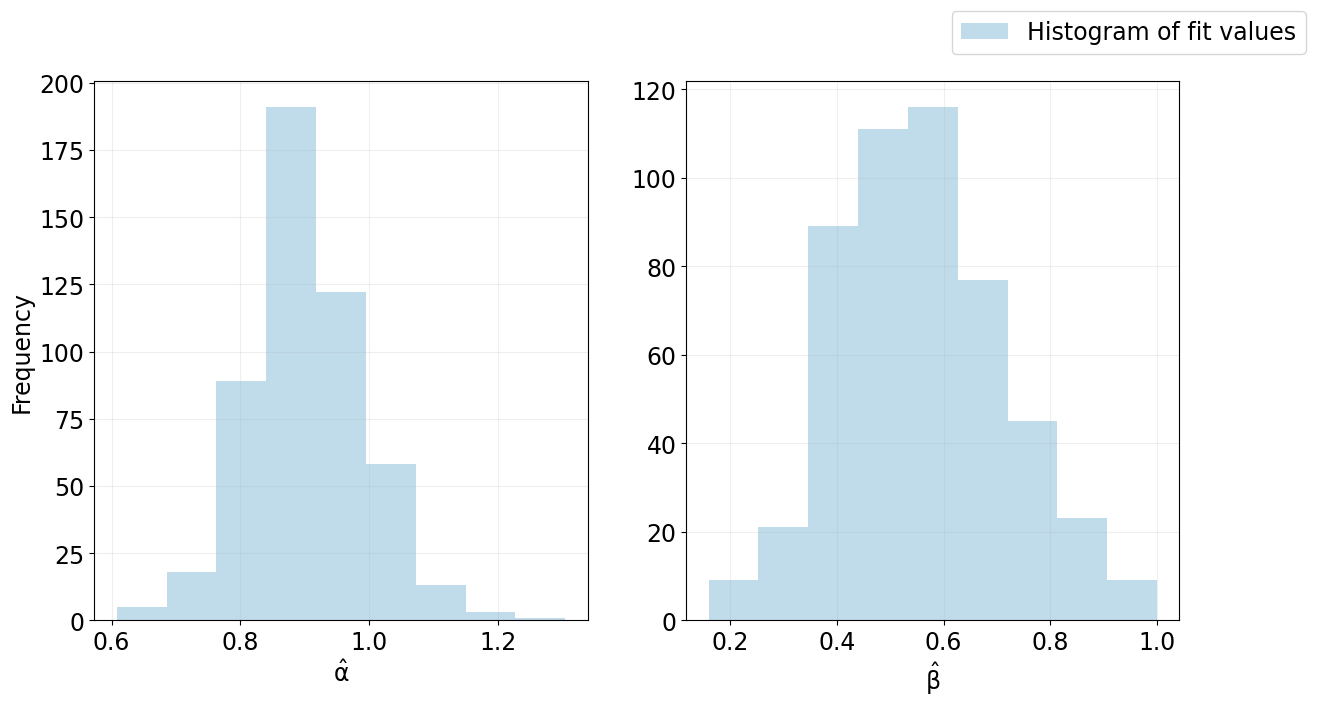

In [16]:
fig2, ax2 = plt.subplots(nrows = 1, ncols = 2, figsize = (14,7))

ax2[0].hist(alpha_hats, color = colors[0], bins = np.linspace(min(alpha_hats),max(alpha_hats),10),
            alpha = 0.7, label = 'Histogram of fit values')
ax2[0].grid(alpha = 0.2)
ax2[0].set(xlabel = r'$\hat{\alpha}$', ylabel = 'Frequency')

ax2[1].hist(beta_hats, color = colors[0], bins = np.linspace(min(beta_hats),max(beta_hats),10), alpha = 0.7)
ax2[1].grid(alpha = 0.2)
ax2[1].set(xlabel = r'$\hat{\beta}$')

fig2.legend();

In [17]:
reload(kk);

In [19]:
##Just for fun trying to do a rasterscan
#
#n = 100
#
#alpha_range = np.linspace(0.7,1,n)
#beta_range = np.linspace(0.3,0.8,n)
#
#fig2, ax2 = plt.subplots(figsize=(10,8))
#res = kk.rasterscan(func_data[0], func_pdf, alpha_range, beta_range, alpha_true, beta_true, fig2, ax2,
#                    xlabel = r'$\alpha$', ylabel = r'$\beta$', plot_params=True)

### Monte Carlo data set 2

In [ ]:
# Initializing for Monte Carlo data set 2

def poisson_pmf(x, lamb):
    return stats.poisson.pmf(x, lamb)   # already normalized

lamb_true = 3.8
N_poisson = 513

xmin_poisson, xmax_poisson = 0, 15  # xmax should be infinite according to assignment, but is approximated

# Generating data using Monte Carlo acc-rej (discrete version as Poisson only accepts integers)
poisson_data = kk.acc_rej_discrete(poisson_pmf, [lamb_true], xmin_poisson, xmax_poisson, N_poisson)

# Saving data set generated
points_poisson = np.array([poisson_data[0], poisson_data[2]]).T
np.savetxt('kuszon_poisson.txt',points_poisson)

In [ ]:
# Checking area under true fit curve, just to ensure, that it is normalized

#np.sum(poisson_pmf(np.arange(xmin_poisson, xmax_poisson),lamb_true))  # it is normalized, yes

0.9999888980804608

In [ ]:
# Fitting by minimizing the log-likelihood (not using function from external file, as we only have 1 variable here)
from iminuit import Minuit
def likelihood_fit(data, func, startparams, var_names):
    
    def log_likelihood(pars): 
        f = np.log(func(data, *pars))
        return -np.sum(f)

    minuit_ullh = Minuit(log_likelihood, startparams, name=var_names)
    minuit_ullh.limits[var_names[0]] = (3,4)

    minuit_ullh.errordef = 0.5
    minuit_ullh.migrad()
    
    par = minuit_ullh.values[:]
    par_err = minuit_ullh.errors[:] 
    par_name = minuit_ullh.parameters[:]
    return par_name, par, par_err

par_name, par, par_err= likelihood_fit(poisson_data[0], poisson_pmf, [lamb_true],['lamb'])

print(f'Best fit value: \n {par_name[0]}: {par} +/- {par_err}')

Best fit value: 
 lamb: [3.7680276459831687] +/- [0.08511566062670828]


In [ ]:
# For plotting the true and the best-fit distribution

# true
xaxis = np.linspace(-0.51, xmax_poisson, 1000)
yaxis = poisson_pmf(np.floor(xaxis + 0.5), lamb_true)

# best fit
xaxis_bf = np.linspace(-0.51,xmax_poisson, 1000)
yaxis_bf = poisson_pmf(np.floor(xaxis + 0.5), par)

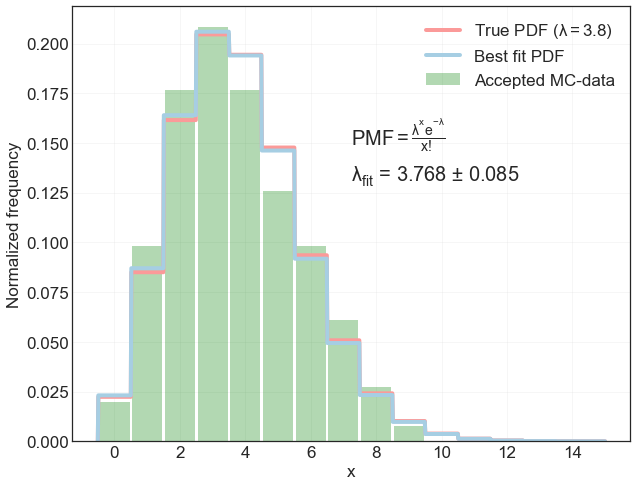

In [ ]:
fig3, ax3 = plt.subplots(figsize = (10,8))

kk.plot_hist(poisson_data[0], xmin_poisson, xmax_poisson,
             np.arange(min(poisson_data[0])-0.5,max(poisson_data[0])+0.5),
             ax3, xlabel='x', ylabel='Normalized frequency', label = 'Accepted MC-data')

#ax3.scatter(poisson_data[0],poisson_data[2], marker='.',color=colors[1], label = 'MC-data points')

ax3.plot(xaxis, yaxis, '-', color=colors[2],label = r'True PDF ($\lambda = 3.8$)');
ax3.plot(xaxis_bf, yaxis_bf, '-', label = 'Best fit PDF');

ax3.text(0.5, 0.75, r'$PMF = \frac{\lambda^xe^{-\lambda}}{x!}$', fontsize=20, 
         transform=ax3.transAxes, verticalalignment='top');

ax3.text(0.5, 0.64, r'$\lambda_{fit}$ = %s $\pm$ %s' %(np.round(*par,3), np.round(*par_err,3)),
         fontsize=20, transform=ax3.transAxes, verticalalignment='top');

ax3.legend()
ax3.grid(alpha=0.2)

## Problem 2

There is a file posted online which has the data points (x, y) that provide the outline of a contained area. The outline is formed by linear interpolation between the data points. The online data is in the correct and specific order to form the outline.

Using Monte Carlo techniques, estimate the area that is contained within the outline. Include a visualization of the technique.

### Solution 1

In [25]:
from scipy import interpolate

df = np.loadtxt('OutlineAreaSpline.txt')
xbat, ybat = df[:,0], df[:,1]

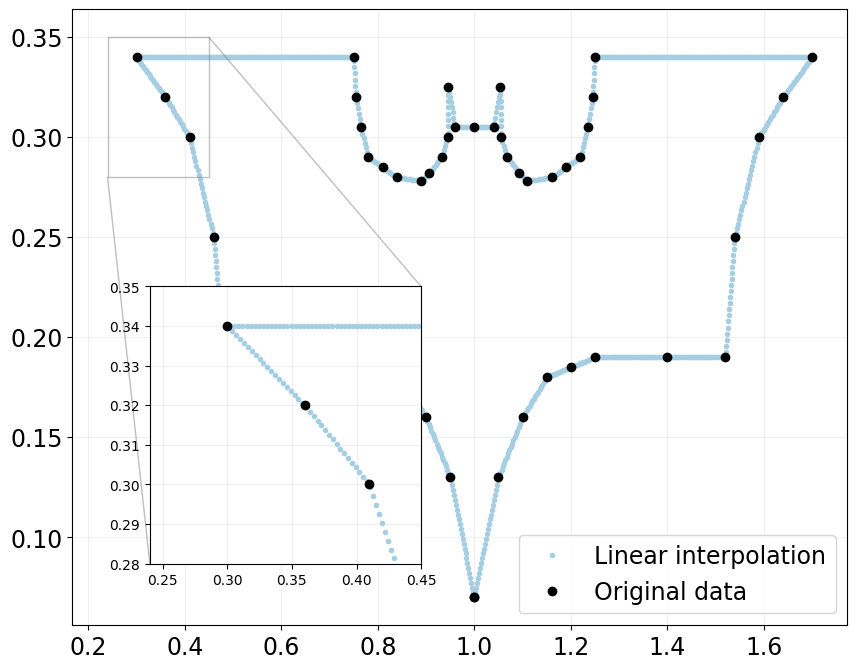

In [26]:
# Linear length along the line
distance = np.cumsum(np.sqrt(np.sum( np.diff(df, axis=0)**2, axis=1)))
distance = np.insert(distance, 0, 0)/distance[-1]

alpha = np.linspace(0, 1, 1000)
interpolator =  interpolate.interp1d(distance, df, kind='slinear', axis=0)

x_spline = interpolator(alpha).T[0]
y_spline = interpolator(alpha).T[1]

fig4, ax4 = plt.subplots(figsize=(10,8))
ax4.plot(x_spline, y_spline, '.', label='Linear interpolation');
ax4.plot(xbat, ybat,'o', color = 'k',label = 'Original data');
#ax4.set(title = 'Just plotting interpolation for checking')

inset = ax4.inset_axes([0.1,0.1,0.35,0.45])
inset.plot(x_spline, y_spline, '.', label='Linear interpolation');
inset.plot(xbat, ybat,'o', color = 'k',label = 'Original data');
inset.set(xlim=(0.24,0.45), ylim=(0.28,0.35));  # this illustrates the large difference between linear and cubic fit
inset.grid(alpha=0.2)
inset.tick_params(axis='both', which='major', labelsize=10)
ax4.indicate_inset_zoom(inset);

ax4.legend();

In [27]:
%%time

xmin, xmax = 0.3, 0.99
ymin, ymax = min(y_spline), max(y_spline)

r = np.random

x_acc = []
y_acc = []
x_rej = []
y_rej = []

n_acc, n_rej = 0, 0

while n_acc < 10000:
    rnd_x, rnd_y = r.uniform(xmin, xmax), r.uniform(ymin, ymax)
    x_lim = np.where(np.isclose(x_spline, rnd_x, rtol=0.0015))[0] 

    if len(x_lim) != 2 or abs(x_lim[1]-x_lim[0])==1:
        continue
        
    idx1, idx2 = min(x_lim), max(x_lim)
    
    if y_spline[idx1] < rnd_y < y_spline[idx2]:
        x_acc.append(rnd_x)
        y_acc.append(rnd_y)
        n_acc += 1 
    else:
        x_rej.append(rnd_x)
        y_rej.append(rnd_y)
        n_rej += 1 

CPU times: total: 2.64 s
Wall time: 2.65 s


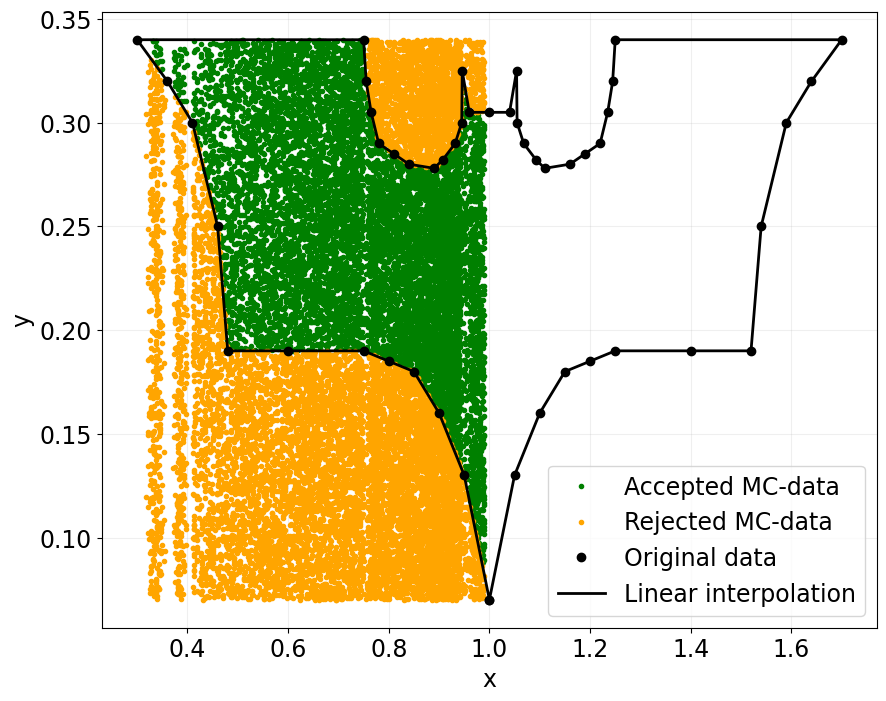

In [28]:
fig5, ax5 = plt.subplots(figsize=(10,8))

ax5.plot(x_acc,y_acc, '.', color = 'g', label = 'Accepted MC-data');
ax5.plot(x_rej,y_rej, '.', color = 'orange', label = 'Rejected MC-data');
ax5.plot(xbat, ybat,'o', color = 'k',label = 'Original data');
ax5.plot(x_spline, y_spline, '-', color='k', label='Linear interpolation', linewidth = 2);
ax5.set(xlabel = 'x', ylabel = 'y')
ax5.legend();


In [29]:
efficiency = len(x_acc)/( len(x_rej) + len(x_acc) )
print(f'Efficienc: {efficiency}')

half_box = ( abs(xmax-xmin) * abs(ymax-ymin) )
print(f'Area of box: {half_box}')

area_batman = efficiency * half_box*2 
print(f'Area of batman: {area_batman}')

Efficienc: 0.4763038818766373
Area of box: 0.18630000000000005
Area of batman: 0.1774708263872351


### Solution 2

In [37]:
#!pip install shapely
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [38]:
shape = Polygon(df)

In [39]:
%%time 

x_acc = []
y_acc = []
x_rej = []
y_rej = []

while len(x_acc) < 10000:
    x_rnd, y_rnd = random.uniform(min(xbat), max(xbat)), random.uniform(min(ybat), max(ybat))
    p = Point(x_rnd, y_rnd)
    if p.within(shape):
        x_acc.append(x_rnd)
        y_acc.append(y_rnd)
    else:
        x_rej.append(x_rnd)
        y_rej.append(y_rnd)

CPU times: total: 1.8 s
Wall time: 1.79 s


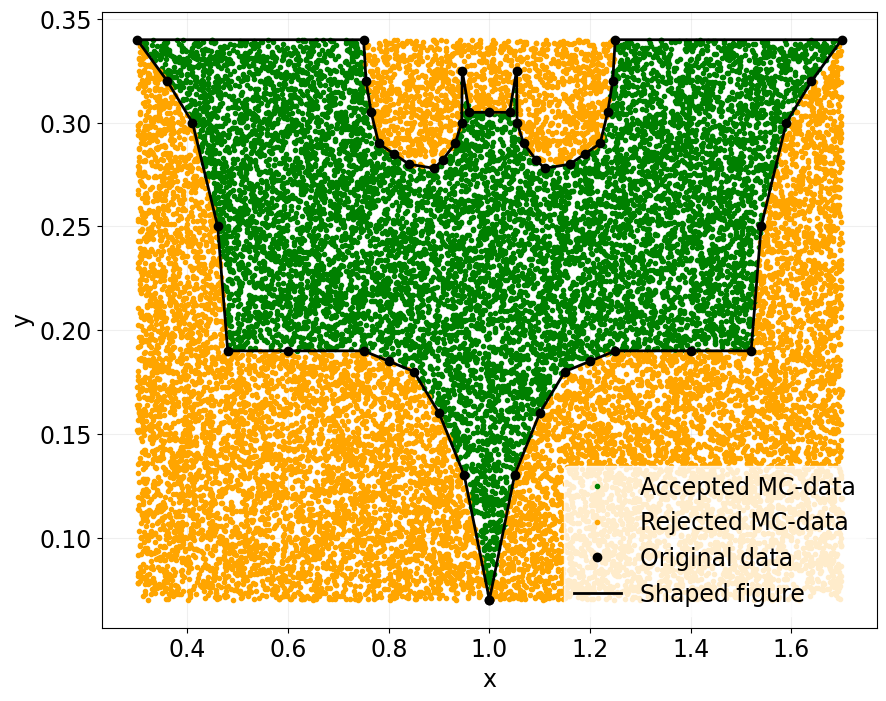

In [40]:
fig, ax = plt.subplots(figsize = (10,8))

ax.set(xlabel = 'x', ylabel = 'y')


ax.plot(x_acc,y_acc, '.', color = 'g', label = 'Accepted MC-data');
ax.plot(x_rej,y_rej, '.', color = 'orange', label = 'Rejected MC-data');
ax.plot(xbat, ybat,'o', color = 'k',label = 'Original data');
ax.plot(xbat, ybat,'-', color = 'k', linewidth=2, label = 'Shaped figure');

# to get white background of the legend
legend = plt.legend(frameon = 1, loc= 'lower right')
frame = legend.get_frame()
frame.set_color('white')
#ax.legend();

In [41]:
efficiency = len(x_acc)/( len(x_rej) + len(x_acc) )
print(f'Efficienc: {efficiency}')

full_box = ( abs(max(xbat) - min(xbat)) * abs(max(ybat)-min(ybat)) ) 
print(f'Area of box: {full_box}')

area_batman = efficiency * full_box 
print(f'Area of batman: {area_batman}')

Efficienc: 0.43946385409800043
Area of box: 0.378
Area of batman: 0.16611733684904417


## Problem 3 
Suppose that there are genes which are individually ‘x' or ‘X’, and in combination determine some trait, e.g. hair color: xx is red, mixed genes (xX or Xx) are black, and XX is black. The population has a proportion of red-haired people equal to $p^2$ and mixed gene people equal to 2p(1-p), for 0<p<1. Each parent gives a single gene to their offspring, with a 50:50 probability of x or X for mixed gene parents. We can assume a random mixture of parents within the population.

#### 3a) Of children that are xX what is the proportion that come from parents which both have black hair?
- Hint this is a conditional probability.
- The ordering of the gene pairs is irrelevant, e.g. xX=Xx.

### FOREFRA MED DE ANDRE!

In [42]:
p = np.linspace(0.01,0.99,1000)

p_red = p**2                 # Population proportion of xx (redheads)
p_mixed = 2*p*(1-p)          # Population proportion of xX=Xx mixed-genes (blackheads)
p_big = 1-p_red-p_mixed  # Population proportion of XX (blackheads)

p_black = 1-p_red

[Text(0.5, 0, 'p'), Text(0, 0.5, 'Population proportion')]

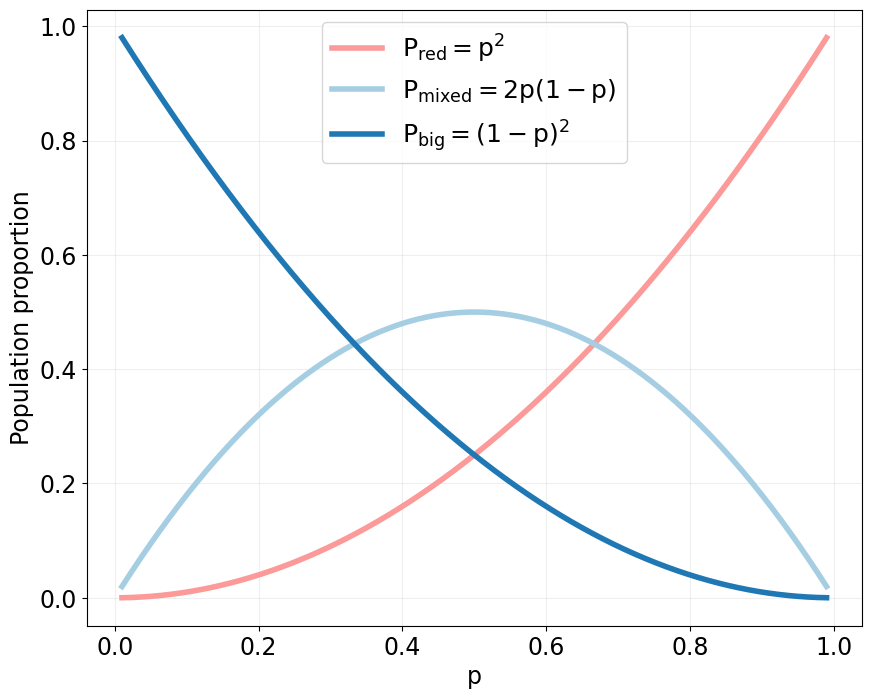

In [43]:
fig1, ax1 = plt.subplots(figsize = (10,8))
ax1.plot(p,p_red, color = colors[2],label = r'$P_{red} = p^2$')
ax1.plot(p,p_mixed, label = r'$P_{mixed} = 2p(1-p)$')
ax1.plot(p,p_big, label = r'$P_{big} = (1-p)^2$')
ax1.legend(loc = 'upper center',fontsize = 18)
ax1.set(xlabel = 'p', ylabel = 'Population proportion')

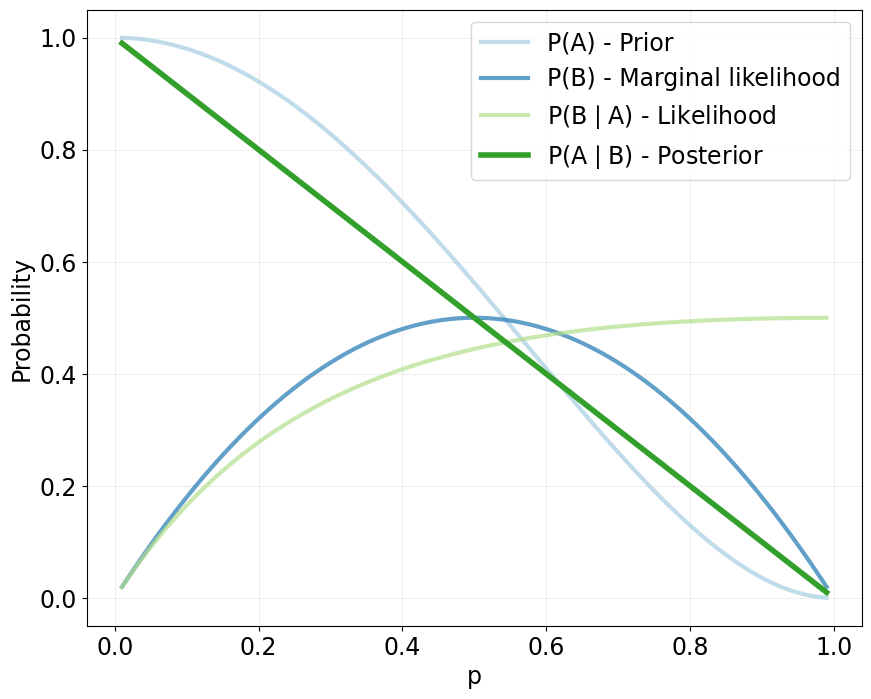

In [44]:

P_B_A = (  1/2 * ((p_mixed)/p_black)**2
          + 2 * 1/2 * p_mixed/p_black * p_big/p_black )

P_A = (1-p_red)**2
P_B = p_mixed

P_A_B = P_B_A * P_A / P_B

fig6, ax6 = plt.subplots(figsize = (10,8))

ax6.plot(p, P_A, alpha = 0.7, label = 'P(A) - Prior', linewidth = 3)
ax6.plot(p, P_B, alpha = 0.7, label = 'P(B) - Marginal likelihood', linewidth = 3)
ax6.plot(p,P_B_A, alpha = 0.7, label = r'P(B$\mid$A) - Likelihood',linewidth = 3)
ax6.plot(p,P_A_B,label = 'P(A$\mid$B) - Posterior')

ax6.set(xlabel = 'p', ylabel = 'Probability')

ax6.legend();

3b) A person (parent A) that does have black hair and has parents w/ black hair produces N offspring w/ someone (parent B) that is known to have a xX gene combination. What is the posterior probability that parent A has a xX gene combination?
- All N offspring have black hair.
- The ordering of the gene pairs is irrelevant, e.g. xX=Xx.
- Hint: “Chain Rule”

[Text(0.5, 0, 'p'), Text(0, 0.5, '$P(A\\mid B_1 & B_2 )$')]

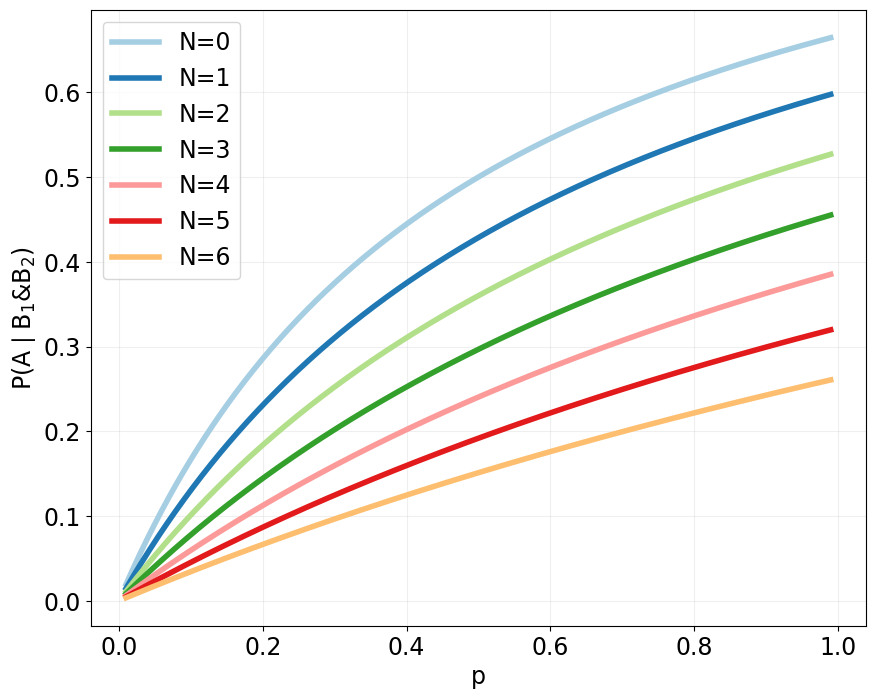

In [46]:
N = 9

P_B1_A = 1-p
P_A = p_mixed
P_tA = p_big
P_B2_tA = 1
P_B1_tA = 1

'''
unødvendig udregning, fordi den til slut vil give 1!
P_tA_B1 = (  1/4 * (pop_mixed/pop_black)**2
          + 2 * 1/2 * (pop_mixed/pop_black) * (pop_big/pop_black)
          + (pop_big/pop_black)**2 )

P_B1_tA = P_tA_B1 * (pop_black**2) / pop_big
'''


fig8, ax8 = plt.subplots(figsize = (10,8))
for i in np.arange(0,7):
    P_B2_A = (3/4)**i
    res = P_B1_A * P_B2_A * P_A / (P_B1_A * P_B2_A * P_A + P_B1_tA * P_B2_tA * P_tA)
    ax8.plot(p,res,  label = r'N=%s' %(i))  # $P(A\mid B_1 & B_2 )$
ax8.legend()
ax8.set(xlabel = 'p', ylabel =r'$P(A\mid B_1 & B_2 )$')
#ax8.plot(p,P_B1_tA)

#ax8.plot(p,P_B1_tA,label = '')

## Exercise 4
In an earlier lecture we used a prior for the total number of fish in a lake that was based on the ratio (and related uncertainties) of the volume of a lake and the volume that fish singly occupied. The combined uncertainty, and the mean for the prior, do not follow canonical error propagation or simple estimates. Find the mean for the total fish population and the range of fish population which covers the interquartile range.
- Lake volume estimate is gaussian with 5000 ± 300 m3
- Fish volume estimate is gaussian with 10 ± 1 m3
- The interquartile range covers the central 50% of the distribution, i.e. the range from 25% to 75%.
- The distribution will be slightly non-gaussian, so do not assume that: a) the uncertainties, and therefore the interquartile ranges, are symmetric, b) the distribution is gaussian.

In [ ]:
lake_val = 5000
lake_unc = 300

perfish_val = 10
perfish_unc = 1

mu = lake_val / perfish_val
std = np.sqrt( (1/perfish_val)**2 * lake_unc**2 + (-lake_val/(perfish_val**2))**2 * perfish_unc**2)
std

58.309518948453004

[Text(0.5, 0, 'Fish volume estimate'), Text(0, 0.5, 'Normalized frequency')]

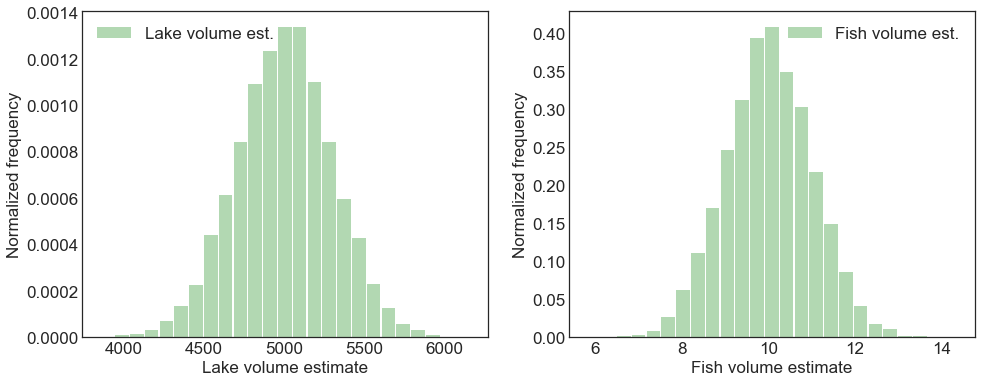

In [ ]:
ran_gauss_lake_val = np.random.normal(loc=lake_val,scale = lake_unc, size=10000)
ran_gauss_perfish_val = np.random.normal(loc=perfish_val, scale = perfish_unc, size=10000)
fig7, ax7 = plt.subplots(nrows = 1, ncols = 2, figsize = (16,6))
kk.plot_hist(ran_gauss_lake_val, min(ran_gauss_lake_val), max(ran_gauss_lake_val), 25, ax7[0],
             label = 'Lake volume est.')
kk.plot_hist(ran_gauss_perfish_val, min(ran_gauss_perfish_val), max(ran_gauss_perfish_val), 25, ax7[1],
             label = 'Fish volume est.')

ax7[0].set(xlabel = 'Lake volume estimate', ylabel = 'Normalized frequency')
ax7[1].set(xlabel = 'Fish volume estimate', ylabel = 'Normalized frequency')

In [ ]:
d = ran_gauss_lake_val / ran_gauss_perfish_val

d_sort = np.sort(d)
d_25 = d_sort[int(len(d)/100*25)]
d_75 = d_sort[int(len(d)/100*75)]
print(d_25, d_75)

d_mean = np.mean(d)
d_median = np.median(d)
print(d_mean, d_median)

462.5265904513274 541.2991978108067
504.7928101665412 499.8203648085885


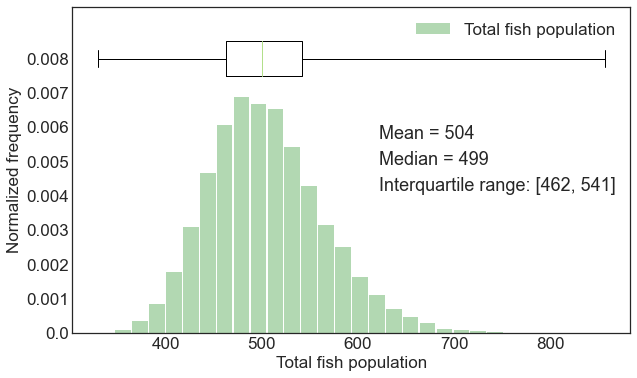

In [ ]:

fig8, ax8 = plt.subplots(figsize = (10,6))
ax8.boxplot(d, positions= [0.008], widths=0.001, whis=10, vert = False)

kk.plot_hist(d, min(d), max(d), 30, ax8,d_print=False, label = 'Total fish population')
ax8.set(xlabel = 'Total fish population', ylabel = 'Normalized frequency')

#ax8.vlines(d_mean,0,0.0072, color = colors[2],linewidth=2,label = 'Mean')
#ax8.vlines(d_median,0,0.0072, color = colors[3], linewidth=2, label = 'Median')

ax8.text(0.55, 0.64, r'Mean = %s ' %(int(np.floor(d_mean))),
         fontsize=18, transform=ax8.transAxes, verticalalignment='top');

ax8.text(0.55, 0.56, r'Median = %s ' %(int(np.floor(d_median))),
         fontsize=18, transform=ax8.transAxes, verticalalignment='top');

ax8.text(0.55, 0.48, r'Interquartile range: [%s, %s]' %(int(np.floor(d_25)), int(np.floor(d_75))),
         fontsize=18, transform=ax8.transAxes, verticalalignment='top');

ax8.set(ylim=(0,0.0095))
ax8.legend(loc= 'upper right');

y = np.arange(0,0.009,0.001)
ax8.set_yticks(y)
ax8.set_yticklabels(y);
 